### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar imágenes

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Leer imagen

In [6]:
img0 = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Cromo.png")
img=cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

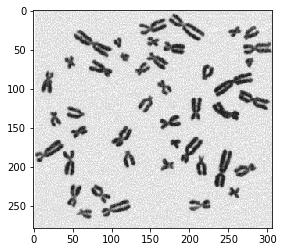

In [7]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [8]:
def grafica(ima1, ima2):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(ima1, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1,2,2)
    plt.imshow(ima2, cmap='gray', vmin=0, vmax=255)
    plt.show()

### crear imagen binaria

In [18]:
threshold_used,imgB=cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
threshold_used

149.0

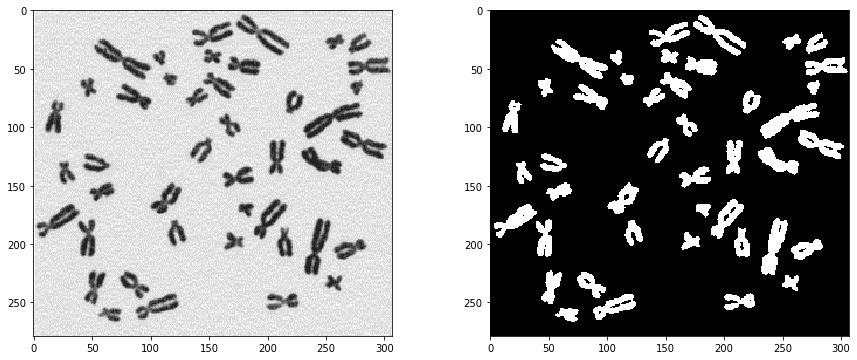

In [16]:
grafica(img,imgB)

### Filtrar por Cierre

In [19]:
kernel = np.ones((3,3),np.uint8)
ima2 = cv2.dilate(imgB,kernel,iterations = 1)
ima2 = cv2.erode(ima2,kernel,iterations = 1)

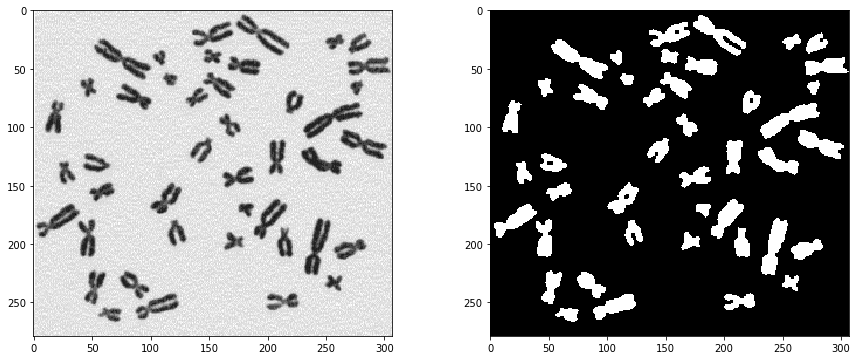

In [20]:
grafica(img,ima2)

### Etiquetado
El algoritmo de etiquetado parte de un concepto sencillo: todos los pixeles conectados espacialmente hacen parte de un mismo objeto y a ese objeto se le asigna una etiqueta diferente a cualquier otro elemento. 



**One component at a time**

This is the fast and very simple method. 

It is based on graph traversal methods in graph theory. 

- Once the first pixel of a connected component is found, all the connected pixels of that connected component are labelled before going onto the next pixel in the image. 

In order to do that a linked list is formed that will keep the indexes of the pixels that are connected to each other. 

The method of defining the linked list specifies the use of a depth or a breadth first search. 

It is assumed that the input image is a binary image, with pixels being either background or foreground and that the connected components in the foreground pixels are desired. 

The algorithm steps can be written as:

 

1.   Start from the first pixel in the image. Set current label to 1.
2.   If this pixel is a foreground pixel and it is not already labelled, give it the current label and add it as the first element in a queue, then go to (3). 

 If it is a background pixel or it was already labelled, then repeat (2) for the next pixel in the image.
3. Pop out an element from the queue, and look at its neighbours (based on any type of connectivity). 

 If a neighbour is a foreground pixel and is not already labelled, give it the current label and add it to the queue. Repeat (3) until there are no more elements in the queue.
4. Go to (2) for the next pixel in the image and increment current label by 1.

Note that the pixels are labelled before being put into the queue. 

The queue will only keep a pixel to check its neighbours and add them to the queue if necessary. 

This algorithm only needs to check the neighbours of each foreground pixel once and doesn't check the neighbours of background pixels.


El siguiente comando recibe una imagen binararia y retorna dos argumentos, el primero de ellos es el número de elementos u objetos encontrados contando el fondo de la imagen binaria y el segundo de ellos es una imagen con las etiquetas correspondientes para cada elemento.

In [21]:
elem , mask = cv2.connectedComponents(ima2)

In [41]:
elem, mask.shape, ima2.shape

(44, (279, 307), (279, 307))

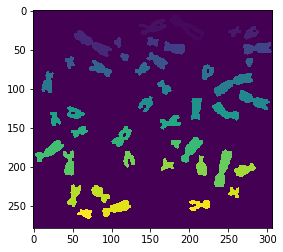

In [48]:
plt.imshow(mask)

Pixeles del elemento  600


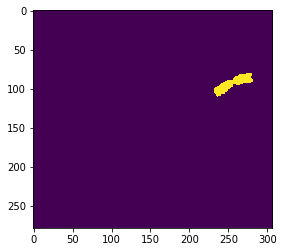

In [59]:
Elemento = 18
selected_element = (mask == Elemento)
plt.imshow(mask*(selected_element))
print('Pixeles del elemento ', np.sum(selected_element))

In [54]:
Tam = np.zeros(elem)
for i in range(elem):
    Tam[i] = np.sum(mask == i) # Calculo de tamaño de cada elemento
print ('Tamanhos de todos los elementos ', Tam)

Tamanhos de todos los elementos  [73752.   516.   368.   122.   194.   571.    90.   140.   305.   404.
    89.   289.   130.    87.   308.   173.   214.   282.   600.   189.
   464.   227.   321.   379.   226.   168.   274.   190.   329.   424.
   428.   106.   339.   555.   201.   244.   153.   288.   287.   284.
   124.   413.   251.   155.]


#### Organizar de menor a mayor

In [57]:
Ind=np.argsort(Tam)
Ind

array([13, 10,  6, 31,  3, 40, 12,  7, 36, 43, 25, 15, 19, 27,  4, 34, 16,
       24, 21, 35, 42, 26, 17, 39, 38, 37, 11,  8, 14, 22, 28, 32,  2, 23,
        9, 41, 29, 30, 20,  1, 33,  5, 18,  0], dtype=int64)

#### Graficar todos los elementos de manera individual

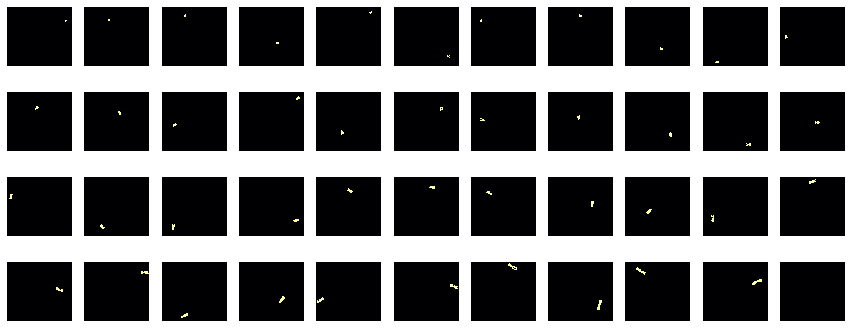

In [60]:
plt.figure(figsize=(15,6))
for i in range(elem):
    bol=(mask==Ind[i])
    plt.subplot(4,11,i+1)
    plt.imshow(mask*bol, cmap='inferno')
    plt.axis('off')